In [24]:
import mxnet as mx
import numpy as np
import logging
import mnist

In [3]:
mnist.downloadmnist('data/mnist')

data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists


In [4]:
train_x, train_y, test_x, test_y = mnist.readmnist('data/mnist')

In [5]:
epochs = 10
batch_size = 128

In [6]:
train_iter = mx.io.NDArrayIter(data = train_x, label = train_y, batch_size = batch_size, shuffle = True)
test_iter = mx.io.NDArrayIter(data = test_x, label = test_y, batch_size = batch_size)

In [8]:
data = mx.sym.Variable("data")

In [9]:
fc1 = mx.sym.FullyConnected(data, name = 'fc1', num_hidden = 64)
relu1 = mx.sym.Activation(fc1, name = 'relu1', act_type = "relu")
fc2 = mx.sym.FullyConnected(relu1, name = "fc2", num_hidden = 10)
out = mx.sym.SoftmaxOutput(fc2, name = "softmax")

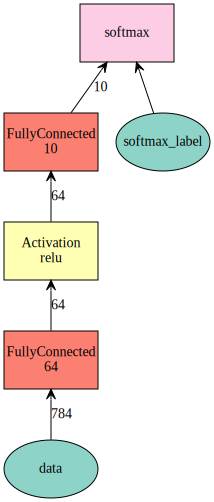

In [10]:
#We can visualize the entire layer by just giving it input size
temp_shape = {"data" : (batch_size, 784)}
mx.viz.plot_network(symbol = out, shape = temp_shape)

In [11]:
mod = mx.mod.Module(out)

In [12]:
print(mod.data_names)
print(mod.label_names)
print(train_iter.provide_data)
print(train_iter.provide_label)

['data']
['softmax_label']
[DataDesc[data,(128, 784),<class 'numpy.float32'>,NCHW]]
[DataDesc[softmax_label,(128, 10),<class 'numpy.float32'>,NCHW]]


In [13]:
mod.bind(data_shapes = train_iter.provide_data, label_shapes = train_iter.provide_label)

In [15]:
mod.init_params(initializer = mx.init.Xavier(magnitude = 2.))

In [19]:
mod.init_optimizer(optimizer = 'sgd', optimizer_params = (('learning_rate',0.01),))

In [27]:
mod.fit(train_iter, num_epoch = 50)

/home/anm/anaconda3/lib/python3.6/site-packages/mxnet/module/base_module.py:488: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)


In [ ]:
'''
Alternative approach
mod.fit(train_iter,
        initializer = mx.initializer.Xavier(rnd_type = 'gaussian', factor_type 'avg', magnitude = 1.),
        optimizer = 'adam',
        optimizer_params= {'learning_rate':0.001},
        eval_metric = mx.metric.MSE(),
        num_epoch = epoch)
'''

In [39]:
mod.score(train_iter, ['mse','acc'])

[('mse', 27.41484232544899), ('accuracy', 0.70375)]

In [22]:

for preds,i, batch in mod.iter_predict(test_iter):
    label = batch.label[0].asnumpy().astype(int)
    pred_label = preds[0].asnumpy().argmax(axis = 1)
    correct_preds = np.sum(pred_label == label)
    

/home/anm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
